<a href="https://colab.research.google.com/github/wakasaki41/to_LaTeX/blob/main/to_latex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [ ]:
import cv2
import time
import math
import types
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from PIL import Image, ImageOps
from keras.preprocessing.image import ImageDataGenerator
from collections import deque

# googledriveへのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 機械学習

77
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B7580FC90>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74F93750>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74EAB110>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74EAB810>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74EABF90>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74F119D0>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74F11A10>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74F11B10>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74EABC90>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74EAB510>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74EBBA90>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74F11E50>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74F11F10>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74EBBB90>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74EBB310>
<PIL.Image.Image image mode=L size=100x100 at 0x7F5B74EC8910>
<PIL.

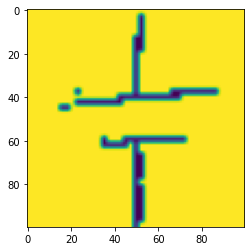

In [ ]:
import tensorflow
from tensorflow import keras
from PIL import Image, ImageOps
from keras.preprocessing.image import ImageDataGenerator
IMAGESIZE=77
MIZUMASI=500
PART_SIZE=50
x_train = np.arange(IMAGESIZE*MIZUMASI*PART_SIZE*PART_SIZE).reshape(IMAGESIZE*MIZUMASI,PART_SIZE,PART_SIZE)
y_train = np.arange(IMAGESIZE*MIZUMASI).reshape(IMAGESIZE*MIZUMASI)
'''0・・・抵抗（縦）
   1・・・抵抗（横）
   2・・・コンデンサ（横）
   3・・・GND
   4・・・接点（下）
   5・・・接点（｜-）
   6・・・角（⁻｜）
   7・・・トランジスタ(NPN -|=)
   8・・・コンデンサ（縦）
   9・・・接点（上）
   10・・・接点（-｜）
   11・・・接点（+）
   12・・・角（|⁻）
   13・・・角（_|）
   14・・・角（|_）
   15・・・トランジスタ(NPN =|-)
   16・・・トランジスタ(PNP -|=)
   17・・・トランジスタ(PNP =|-)
   18・・・コイル（横）
   19・・・コイル（縦）
   20・・・交流（横）
   21・・・交流（縦）
   22・・・電流計（横）
   23・・・電流計（縦）
   24・・・電圧計（横）
   25・・・電圧計（縦）
   26・・・直流電源(|≀)
   27・・・直流電源(≀|)
   28・・・直流電源()
   29・・・直流電源(二)
   '''
anss = [0,2,5,4,0,7,1,2,4,2,3,0,5,6,0,3,6,3,3,8,0,9,12,6,8,8,5,10,
        20,6,12,4,19,21,24,22,11,5,10,25,19,23,18,18,13,9,14,
        18,2,6,12,23,21,24,6,12,13,1,9,14,9,
        7,15,15,7,17,17,16,16,27,27,26,26,28,28,29,29]
  
print(len(anss))
for k in range(IMAGESIZE):
  ans=anss[k]
  img = Image.open('drive/My Drive/datas/datas2/part{0}.png'.format(k)).convert('L')
  plt.imshow(img)
  print(img)


  x = keras.preprocessing.image.img_to_array(img)
  # (height, width, 3) -> (1, height, width, 3)
  x = x.reshape((1,) + x.shape)

  datagen = ImageDataGenerator(
            rotation_range=3,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.4,
            zoom_range=0.2,
            horizontal_flip=False,
            vertical_flip=False,
            fill_mode='nearest')

  for d, i in zip(datagen.flow(x, batch_size=1), range(MIZUMASI)):
    filename = 'C:\\save\\' + str(i) + '.png'
    img = keras.preprocessing.image.array_to_img(d[0], scale=True)
    im_inv = ImageOps.invert(img)
    im_inv.thumbnail((PART_SIZE, PART_SIZE))
    im_inv = np.array(im_inv)
    #plt.imshow(im_inv)
    #print(im_inv)
    x_train[i+k*MIZUMASI] = im_inv
    y_train[i+k*MIZUMASI] = ans
    #cv2.imwrite("train{0}.png".format(i+k*MIZUMASI),im_inv)

In [ ]:
x_train = x_train / 255.0

In [ ]:
# 入力層の設定
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((PART_SIZE, PART_SIZE)))# 入力層は28*28
model.add(tf.keras.layers.Flatten())# 一次元配列に変換

In [ ]:
# 中間層の設定
model.add(tf.keras.layers.Dense(128))# 128個に全結合
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))# 中間層の活性化関数の設定
model.add(tf.keras.layers.Dropout(0.2))# 20%ドロップアウトさせる

In [ ]:
model.add(tf.keras.layers.Dense(30))# 出力層の設定
model.add(tf.keras.layers.Activation(tf.keras.activations.softmax))

In [ ]:

model.compile(
   optimizer=tf.keras.optimizers.Adam(),
   loss=tf.keras.losses.sparse_categorical_crossentropy,
   metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1204/1204 [==============================] - 6s 3ms/step - loss: 0.9558 - sparse_categorical_accuracy: 0.7398
Epoch 2/5
1204/1204 [==============================] - 3s 3ms/step - loss: 0.2530 - sparse_categorical_accuracy: 0.9334
Epoch 3/5
1204/1204 [==============================] - 3s 3ms/step - loss: 0.1424 - sparse_categorical_accuracy: 0.9629
Epoch 4/5
1204/1204 [==============================] - 3s 3ms/step - loss: 0.0997 - sparse_categorical_accuracy: 0.9741
Epoch 5/5
1204/1204 [==============================] - 3s 3ms/step - loss: 0.0709 - sparse_categorical_accuracy: 0.9811


# パラメータ

In [ ]:
B=200000 #画像の面積
Straight=0.2 #これより角度の誤差が小さければ縦・横の線とみなす
###影除去のパラメータ###
ksize = 30
th=0.9
######重複処理########
diserr = 10.0
therr = 0.12
######################


extend = 20.0;   #線を長くする長さ
shorten= 10.0     #線を短くするくする長さ
rhoerr = 9.0;
minL=10         #長さがこれ以下の線は直線とみなさない
endrmv = 8
criclermv=0
CMIN = 1500;    #これ以上の離れている点はコンデンサではない

CorE = 500   #2辺の長さの差がこれ以上なら電源

######出力########
DIVSIZE=50.0
YSTR = 10.0

# UnionFind

In [ ]:
from collections import defaultdict

class UnionFind():
    def __init__(self, n):
        self.n = n
        self.parents = [-1] * n

    def find(self, x):
        if self.parents[x] < 0:
            return x
        else:
            self.parents[x] = self.find(self.parents[x])
            return self.parents[x]

    def union(self, x, y):
        x = self.find(x)
        y = self.find(y)

        if x == y:
            return

        if self.parents[x] > self.parents[y]:
            x, y = y, x

        self.parents[x] += self.parents[y]
        self.parents[y] = x

    def size(self, x):
        return -self.parents[self.find(x)]

    def same(self, x, y):
        return self.find(x) == self.find(y)

    def members(self, x):
        root = self.find(x)
        return [i for i in range(self.n) if self.find(i) == root]

    def roots(self):
        return [i for i, x in enumerate(self.parents) if x < 0]

    def group_count(self):
        return len(self.roots())

    def all_group_members(self):
        group_members = defaultdict(list)
        for member in range(self.n):
            group_members[self.find(member)].append(member)
        return group_members

    def __str__(self):
        return '\n'.join(f'{r}: {m}' for r, m in self.all_group_members().items())


# 幾何学ライブラリ

In [ ]:
from math import sqrt


def cross(P0, P1, P2):
    x0, y0 = P0; x1, y1 = P1; x2, y2 = P2
    x1 -= x0; x2 -= x0
    y1 -= y0; y2 -= y0
    return x1*y2 - x2*y1


def dot(P0, P1, P2):
    x0, y0 = P0; x1, y1 = P1; x2, y2 = P2
    x1 -= x0; x2 -= x0
    y1 -= y0; y2 -= y0
    return x1*x2 + y1*y2


def dist2(P0, P1):
    x0, y0 = P0; x1, y1 = P1
    return (x1 - x0)**2 + (y1 - y0)**2


def collision_ll(S0, S1, T0, T1):
    return cross(S0, S1, T0)*cross(S0, S1, T1) < 0 and cross(T0, T1, S0) * cross(T0, T1, S1) < 0


def dist_lp(S, E, P):
    dd = dist2(S, E)
    if 0 <= dot(S, E, P) <= dd:
        return abs(cross(S, E, P))/sqrt(dd)
    return sqrt(min(dist2(S, P), dist2(E, P)))


def dist_ll(S0, S1, T0, T1):
    if collision_ll(S0, S1, T0, T1):
        return 0
    return min(
            dist_lp(S0, S1, T0),
            dist_lp(S0, S1, T1),
            dist_lp(T0, T1, S0),
            dist_lp(T0, T1, S1)
            )



# 回路図読み込み・細線化

In [ ]:
src = 'drive/My Drive/datas/tegaki10.jpg'
img = cv2.imread(src)
cv2.imwrite('org.png', img)
H = img.shape[0]
W = img.shape[1]
img = cv2.resize(img , (int(W/3), int(H/3)))
height = img.shape[0]
width = img.shape[1]
print(height,width)
blur = cv2.blur(img, (ksize, ksize))
rij = img/blur

index_1 = np.where(rij >= th)
index_0 = np.where(rij < th)
rij[index_0] = 0
rij[index_1] = 1
cv2.imwrite("rij_image.png", rij*255) # rijの値は0～1になるはずなので255倍


rij=rij.astype(np.uint8)
gray = cv2.cvtColor(rij*255,cv2.COLOR_BGR2GRAY)

#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

image = cv2.bitwise_not(gray)

skeleton1   =   cv2.ximgproc.thinning(image, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)
print(skeleton1)
print(len(skeleton1))
cv2.imwrite('skeleton.png', skeleton1)
cv2.imwrite('skeletonW.png', 255-skeleton1)

217 369
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
217


True

In [ ]:
visited = np.full((height)*(width),-1).reshape((height, width))
dlist=[]
CNT=0
noise1=4
inf = 2000000000
for sy in range(height):
  for sx in range(width):
    if visited[sy][sx] != -1 or skeleton1[sy][sx] < 230:
      continue
    CNT+=1
    l=sx
    r=sx
    d=sy
    u=sy
    queue = deque([[sy, sx]])
    visited[sy][sx] = 0
    while queue:
      y, x = queue.popleft()
      u=min(u,y)
      d=max(d,y)
      l=min(l,x)
      r=max(r,x)
      for j, k in ([1, 0], [-1, 0], [0, 1], [0, -1], [1, 1], [1, -1], [-1, -1], [-1, 1]):
        new_y, new_x = y+j, x+k
        if new_y<0 or new_x<0 or new_y>=height or new_x>=width:
          continue
        if skeleton1[new_y][new_x] >= 230 and visited[new_y][new_x] == -1:
          visited[new_y][new_x] = visited[y][x] + 1
          queue.append([new_y, new_x])
    if max(d-u,r-l)< noise1:
      dlist.append([u,l,d+1,r+1])

print(len(dlist))
for i in range(len(dlist)):
  for y in range(dlist[i][0],dlist[i][2]):
    for x in range(dlist[i][1],dlist[i][3]):
      skeleton1[y][x]=0
cv2.imwrite('skeleton2W.png', 255-skeleton1)

3


True

# セグメンテーション

In [ ]:
cum = np.zeros((height+1)*(width+1),dtype = int).reshape((height+1, width+1))
for i in range(height):
  for j in range(width):
    if skeleton1[i][j]==255:
      cum[i+1][j+1]=cum[i][j+1]+cum[i+1][j]-cum[i][j]+1
    else: 
      cum[i+1][j+1]=cum[i][j+1]+cum[i+1][j]-cum[i][j]

    #print(cum[i+1][j+1],end=' ')
  #print('\n')

print(cum)
CS =skeleton1.copy()
CS2 =skeleton1.copy()
segment_size=17
T=24
for i in range(height-segment_size):
  for j in range(width-segment_size):
    den = cum[i+segment_size][j+segment_size]-cum[i+segment_size][j]-cum[i][j+segment_size]+cum[i][j]
    #print(cum[i+segment_size][j+segment_size],cum[i+segment_size][j],cum[i][j+segment_size],cum[i][j],den)
    #print(den)
    if den>T:
      for y in range(i,i+segment_size):
        for x in range(j,j+segment_size):
          CS[y][x]=128
          CS2[y][x]=0

  
cv2.imwrite('CS.png',255- CS)
cv2.imwrite('CS2.png', CS2)


[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ... 1847 1847 1847]
 [   0    0    0 ... 1847 1847 1847]
 [   0    0    0 ... 1847 1847 1847]]


True

# 画像認識

In [ ]:

visited = np.full((height)*(width),-1).reshape((height, width))
plist=[]
CNT=0
inf = 2000000000
for sy in range(height):
  for sx in range(width):
    if visited[sy][sx] != -1 or CS[sy][sx] != 128:
      continue
    CNT+=1
    l=sx
    r=sx
    d=sy
    u=sy
    queue = deque([[sy, sx]])
    visited[sy][sx] = 0
    while queue:
      y, x = queue.popleft()
      u=min(u,y)
      d=max(d,y)
      l=min(l,x)
      r=max(r,x)
      for j, k in ([1, 0], [-1, 0], [0, 1], [0, -1]):
        new_y, new_x = y+j, x+k
        if new_y<0 or new_x<0 or new_y>=height or new_x>=width:
          continue
        if CS[new_y][new_x] == 128 and visited[new_y][new_x] == -1:
          visited[new_y][new_x] = visited[y][x] + 1
          queue.append([new_y, new_x])

    plist.append([u,l,d+1,r+1])

#print(CNT)

#print(plist)
CCS=CS2.copy()

for i in range(len(plist)):
  for y in range(plist[i][0],plist[i][2]):
    for x in range(plist[i][1],plist[i][3]):
      CCS[y][x]=0

cv2.imwrite('skeleton3.png',255- CCS)
ptype=npoints = np.arange(len(plist)).reshape(len(plist))
for i in range(len(plist)):
  PART = np.full(PART_SIZE*PART_SIZE,255).reshape((PART_SIZE, PART_SIZE))
  CNT=-1
  imgs = rij[plist[i][0] : plist[i][2] , plist[i][1] :plist[i][3] ]*255
  #print(len(imgs),len(imgs[0]))
  grays = cv2.cvtColor(imgs,cv2.COLOR_BGR2GRAY)
  if len(imgs)>len(imgs[0]):
    grays = cv2.resize(grays , ( int(PART_SIZE*len(imgs[0])/len(imgs)), PART_SIZE))
    #print(len(grays),len(grays[0]))
    for x in range(int((PART_SIZE-len(grays[0]))/2), PART_SIZE-1-int((PART_SIZE-len(grays[0]))/2)):
     # print(x)
      CNT+=1

      for y in range(PART_SIZE):
        PART[y][x]=grays[y][CNT]
      

    #grays = cv2.resize(grays , ( PART_SIZE, PART_SIZE):
  else:
    grays = cv2.resize(grays , (PART_SIZE, int(PART_SIZE*len(imgs)/len(imgs[0]))))
    for y in range(int((PART_SIZE-len(grays))/2), PART_SIZE-1-int((PART_SIZE-len(grays))/2)):
      #print(x)
      CNT+=1
      for x in range(PART_SIZE):
        PART[y][x]=grays[CNT][x]
  cv2.imwrite("part{0}.png".format(i+61), PART)
  PART = cv2.bitwise_not(PART)
  #print(PART)
  PART+=256
  PART = cv2.resize(PART , (PART_SIZE, PART_SIZE))
  #print(len(grays),len(grays[0]))
  #pilImg = Image.fromarray(np.uint8(PART))
  pred = model.predict(PART[np.newaxis])
  print(np.argmax(pred),end=" ")
  ptype[i]=np.argmax(pred)
  #plt.imshow(grays)
  #plt.imshow(PART)
  
#print(type(PART))
#print(type(gray))
print(ptype)

18 2 12 6 21 23 24 6 12 1 13 9 9 14 [18  2 12  6 21 23 24  6 12  1 13  9  9 14]


# 結線検出

In [ ]:
visited = np.full((height)*(width),-1).reshape((height, width))
Llist=[]
CNT=0
for sy in range(height):
  for sx in range(width):
    if visited[sy][sx] != -1 or CCS[sy][sx] < 100:
      continue
    CNT+=1
    l=sx
    r=sx
    d=sy
    u=sy
    queue = deque([[sy, sx]])
    visited[sy][sx] = 0
    while queue:
      y, x = queue.popleft()
      u=min(u,y)
      d=max(d,y)
      l=min(l,x)
      r=max(r,x)
      for j, k in ([1, 0], [-1, 0], [0, 1], [0, -1], [1, 1], [1, -1], [-1, -1], [-1, 1]):
        new_y, new_x = y+j, x+k
        if new_y<0 or new_x<0 or new_y>=height or new_x>=width:
          continue
        if CCS[new_y][new_x] >= 100 and visited[new_y][new_x] == -1:
          visited[new_y][new_x] = visited[y][x] + 1
          queue.append([new_y, new_x])

    Llist.append([u,l,d+1,r+1])

print(len(Llist))
black = np.full((height)*(width),0).reshape((height, width))
CCS2=black.copy()

for i in range(len(Llist)):
  for y in range(Llist[i][0],Llist[i][2]):
    for x in range(Llist[i][1],Llist[i][3]):
      CCS2[y][x]=255

cv2.imwrite('CCS2.png', CCS2)

17


True

In [ ]:
lines=[]
img2 = np.full((img.shape[0],img.shape[1], 3), 255, dtype=np.uint8)
for i in range(len(Llist)):
  if Llist[i][2]-Llist[i][0] > Llist[i][3]-Llist[i][1]:
    lines.append([Llist[i][0],int((Llist[i][3]+Llist[i][1])/2),Llist[i][2],int((Llist[i][3]+Llist[i][1])/2)])
  elif Llist[i][2]-Llist[i][0] < Llist[i][3]-Llist[i][1]:
    lines.append([int((Llist[i][2]+Llist[i][0])/2),Llist[i][1],int((Llist[i][2]+Llist[i][0])/2),Llist[i][3]])
for line in lines:
    y1, x1, y2, x2 = map(int,line[:4])
    lines_img = cv2.line(img2, (x1,y1), (x2,y2), (0,0,0), 1)
cv2.imwrite('lines_img.png', lines_img)
print(lines)

[[59, 287, 59, 316], [61, 47, 61, 99], [64, 199, 64, 239], [76, 332, 89, 332], [78, 31, 85, 31], [108, 215, 108, 247], [115, 111, 115, 145], [125, 263, 167, 263], [134, 94, 171, 94], [154, 331, 165, 331], [163, 34, 172, 34], [182, 217, 182, 247], [182, 280, 182, 315], [185, 125, 185, 134], [186, 116, 186, 124], [187, 108, 187, 114], [188, 53, 188, 75]]


# 線のずれ調整

In [ ]:
rhoerr = 16.0;
lines_group = []
Gseen = np.zeros(len(lines))
cnt=0
for i in range(len(lines)):
  if Gseen[i]==1:
    continue
  lines_group.append([])
  lines_group[cnt].append(i)
  #print(lines_group)
  Gseen[i]=1
  cnt=cnt+1
  for j in range(i+1,len(lines)):
    if Gseen[j]==1:
      continue
    x1, y1, x2, y2 = map(int,lines[i][:4])
    #print(x1 ,y1,x2,y2)
    dx1 = x2-x1
    dy1 = y2-y1
    c1 = abs(-dx1*y1+dy1*x1)
    L1 = dy1 * dy1 + dx1 * dx1;
    ro1 = c1 / math.sqrt(L1)
    
    
    th1=0.0
    if dy1==0:
      th1=math.pi/2.0
    else:
      th1=math.atan(float(dx1)/-float(dy1))
    #print(L1)
    #print(ro1,th1)
    x3, y3, x4, y4 = map(int,lines[j][:4])
    
    dx2 = x4-x3
    dy2 = y4-y3
    c2 = abs(-dx2*y3+dy2*x3)
    L2 = dy2 * dy2 + dx2 * dx2
    ro2 = c2 / math.sqrt(L2)
    
    th2=0.0
    if dy2 == 0:
      th2=math.pi/2.0
    else:
      th2=math.atan(float(dx2)/-float(dy2))
    if abs(ro1 - ro2) < rhoerr and (abs(th1 - th2) < therr or abs(th1 - th2) > math.pi - therr): 
      lines_group[cnt-1].append(j)
      Gseen[j]=1
      print(i,j)
      newx3=x1+dx1*((x3-x1)*dx1+(y3-y1)*dy1)/L1
      newy3=y1+dy1*((x3-x1)*dx1+(y3-y1)*dy1)/L1
      newx4=x1+dx1*((x4-x1)*dx1+(y4-y1)*dy1)/L1
      newy4=y1+dy1*((x4-x1)*dx1+(y4-y1)*dy1)/L1
      lines[j][0]=newx3
      lines[j][1]=newy3
      lines[j][2]=newx4
      lines[j][3]=newy4


print(lines_group)

0 1
0 2
3 9
4 10
5 6
11 12
11 13
11 14
11 15
11 16
[[0, 1, 2], [3, 9], [4, 10], [5, 6], [7], [8], [11, 12, 13, 14, 15, 16]]


In [ ]:
img5 = np.full((img.shape[0],img.shape[1], 3), 255, dtype=np.uint8)
for line2 in lines:
    y1, x1, y2, x2 = map(int,line2[:4])
    lines_img = cv2.line(img5, (x1,y1), (x2,y2), (0,0,0), 1)
cv2.imwrite('lines5_img.png', lines_img)

True

# 素子と角・交差点の振り分け

In [ ]:
P1=[]
P2=[]
P1S=[]
P2S=[]
clist=[4,5,6,9,10,11,12,13,14]
for i in range(len(ptype)):
  if ptype[i] in clist:
    P1.append(ptype[i])
    P1S.append(plist[i])
  else:
    P2.append(ptype[i])
    P2S.append(plist[i])
print(P1,P2)

[12, 6, 6, 12, 13, 9, 9, 14] [18, 2, 21, 23, 24, 1]


# 角・交差点の挿入

In [ ]:
lines2=lines.copy()
extend2=3
for i in range(len(P1)):
  print(P1[i])
  u, l, d, r = map(int,P1S[i][:4])
  tmp=np.arange(4).reshape(4)
  for y3, x3, y4, x4, now in ([u, l, u, r,0], [u, l, d, l,1], [d, l, d, r,2], [u, r, d, r,3]):
    x3 -= extend2
    y3 -= extend2
    x4 += extend2
    y4 += extend2
    for j in range(len(lines)):
      y1, x1, y2, x2 = map(int,lines[j][:4])
      dx1 = x2-x1
      dy1 = y2-y1

      L1 = dy1 * dy1 + dx1 * dx1;

      afdx1 = int(dx1 * extend / math.sqrt(L1))
      afdy1 = int(dy1 * extend / math.sqrt(L1))

      x1 -= afdx1
      y1 -= afdy1
      x2 += afdx1
      y2 += afdy1


      dx2 = x4-x3
      dy2 = y4-y3

      L2 = dy2 * dy2 + dx2 * dx2;
      #print(L2)
      afdx2 = int(dx2 * extend / math.sqrt(L2))
      afdy2 = int(dy2 * extend / math.sqrt(L2))

      '''x3 -= afdx2
      y3 -= afdy2
      x4 += afdx2
      y4 += afdy2'''

      tc = (x1 - x2) * (y3 - y1) + (y1 - y2) * (x1 - x3)
      td = (x1 - x2) * (y4 - y1) + (y1 - y2) * (x1 - x4)
      ta = (x3 - x4) * (y1 - y3) + (y3 - y4) * (x3 - x1)
      tb = (x3 - x4) * (y2 - y3) + (y3 - y4) * (x3 - x2)
      if tc*td < 0 and ta*tb < 0:
          tmp[now]=j
      if now == 3 and j==len(lines)-1:
        
        if P1[i]==4:
          nh=int((lines[tmp[1]][0]+lines[tmp[3]][2])/2)
          
          lines2.append([nh,l,nh,r])
          lines2.append([nh,lines[tmp[2]][1],lines[tmp[2]][2],lines[tmp[2]][3]])
          print(tmp)

        if P1[i]==5:
          nw=int((lines[tmp[0]][1]+lines[tmp[2]][3])/2)
          lines2.append([u,nw,d,nw])
          lines2.append([lines[tmp[3]][0],nw,lines[tmp[3]][2],lines[tmp[3]][3]])
          #print(tmp)

        if P1[i]==6:
          #nh=int((lines[tmp[1]][0]+lines[tmp[3]][2])/2)
          lines2.append([lines[tmp[1]][0],l,lines[tmp[1]][2],lines[tmp[2]][3]])
          lines2.append([lines[tmp[1]][0],lines[tmp[2]][1],d,lines[tmp[2]][3]])
          #lines2.append([nh,lines[tmp[2]][1],lines[tmp[2]][2],lines[tmp[2]][3]])
          #print(tmp)

        if P1[i]==9:
          nh=int((lines[tmp[1]][2]+lines[tmp[3]][0])/2)
          lines2.append([nh,l,nh,r])
          lines2.append([lines[tmp[0]][0],lines[tmp[0]][1],nh,lines[tmp[0]][3]])

        if P1[i]==10:
          nw=int((lines[tmp[0]][1]+lines[tmp[2]][3])/2)
          lines2.append([u,nw,d,nw])
          lines2.append([lines[tmp[1]][0],lines[tmp[1]][1],lines[tmp[1]][2],nw])

        if P1[i]==11:
          nh=int((lines[tmp[1]][0]+lines[tmp[3]][2])/2)
          nw=int((lines[tmp[0]][1]+lines[tmp[2]][3])/2)
          lines2.append([nh,l,nh,r])
          lines2.append([u,nw,d,nw])

        if P1[i]==12:
          lines2.append([lines[tmp[3]][0],lines[tmp[2]][1],lines[tmp[3]][2],r])
          lines2.append([lines[tmp[3]][0],lines[tmp[2]][1],d,lines[tmp[2]][3]])

        if P1[i]==13:
          lines2.append([lines[tmp[1]][0],l,lines[tmp[1]][2],lines[tmp[0]][3]])
          lines2.append([u,lines[tmp[0]][1],lines[tmp[1]][0],lines[tmp[0]][3]])

        if P1[i]==14:
          lines2.append([lines[tmp[3]][0],lines[tmp[0]][1],lines[tmp[3]][2],r])
          lines2.append([u,lines[tmp[0]][1],lines[tmp[3]][0],lines[tmp[0]][3]])
        
          

              


12
6
6
12
13
9
9
14


In [ ]:
img3 = np.full((img.shape[0],img.shape[1], 3), 255, dtype=np.uint8)
for line2 in lines2:
    y1, x1, y2, x2 = map(int,line2[:4])
    lines_img = cv2.line(img3, (x1,y1), (x2,y2), (0,0,0), 1)
cv2.imwrite('lines3_img.png', lines_img)

True

# 重複処理

In [ ]:

######重複処理########
diserr = 8.0
therr = 0.06
uf = UnionFind(len(lines2))
for i in range(len(lines2)):
    x1, y1, x2, y2 = map(int,lines2[i][:4])
    for j in range(i+1,len(lines2)):
      x3, y3, x4, y4 = map(int,lines2[j][:4])
      dxi = x2-x1
      dyi = y2-y1
      thi=0
      if dyi==0:
        thi=math.pi/2.0
      else:
        thi=math.atan(float(dxi)/-float(dyi))

      dxj = x4-x3
      dyj = y4-y3
      thj=0
      if dyj==0:
        thj=math.pi/2.0
      else:
        thj=math.atan(float(dxj)/-float(dyj))
      
      dis = dist_ll((x1,y1),(x2,y2),(x3,y3),(x4,y4))

      if dis < diserr and (abs(thi - thj) < therr or abs(thi - thj) > math.pi - therr):  
        uf.union(i,j)




In [ ]:
uflist=list(uf.all_group_members().values())
print(uflist)
rlines = np.arange(len(uflist)*4).reshape((len(uflist), 4))
#rflag = np.arange(len(uflist)).reshape((len(uflist)))
for i in range(len(uflist)):
  rflag=0
  for j in range(len(uflist[i])):
    x1, y1, x2, y2 = map(int,lines2[uflist[i][j]][:4])
    if j==0:
      
      if (x2-x1)*(y2-y1)>0:
        rflag=1
        rlines[i][0]=min(x2,x1)
        rlines[i][1]=min(y2,y1)
        rlines[i][2]=max(x2,x1)
        rlines[i][3]=max(y2,y1)
      else :
        rlines[i][0]=min(x2,x1)
        rlines[i][1]=max(y2,y1)
        rlines[i][2]=max(x2,x1)
        rlines[i][3]=min(y2,y1)

    else :
      if rflag==1:
        rlines[i][0]=min(x2,x1,rlines[i][0])
        rlines[i][1]=min(y2,y1,rlines[i][1])
        rlines[i][2]=max(x2,x1,rlines[i][2])
        rlines[i][3]=max(y2,y1,rlines[i][3])
      else:
        rlines[i][0]=min(x2,x1,rlines[i][0])
        rlines[i][1]=max(y2,y1,rlines[i][1])
        rlines[i][2]=max(x2,x1,rlines[i][2])
        rlines[i][3]=min(y2,y1,rlines[i][3])

print(rlines)

[[0, 19], [1, 17], [2], [3, 20], [4, 18], [5, 21], [6, 23], [7, 22, 28], [8, 24, 30], [9, 26], [10, 32], [11, 12, 25, 27], [13, 14, 15, 16, 29, 31]]
[[ 59 332  59 287]
 [ 59  99  59  31]
 [ 59 239  59 199]
 [ 59 332  89 332]
 [ 59  31  85  31]
 [108 263 108 215]
 [108 145 108  94]
 [108 263 182 263]
 [108  94 182  94]
 [154 332 182 332]
 [163  31 182  31]
 [182 332 182 217]
 [182 134 182  31]]


# 線の傾き調整

In [ ]:
Straight=0.2 #これより角度の誤差が小さければ縦・横の線とみなす
for i in range(len(rlines)):
  x1, y1, x2, y2 = map(int,rlines[i][:4])
  dxi = x2-x1
  dyi = y2-y1
  thi=0
  if dyi==0:
    thi=math.pi/2.0
  else:
    thi=math.atan(float(dxi)/float(dyi))

  if abs(thi) < Straight:
    rlines[i][0] = (x1+x2)/2
    rlines[i][2] = (x1+x2)/2
  elif abs(math.pi/2.0-thi)<Straight or abs(math.pi/2.0+thi)<Straight:
    rlines[i][1] = (y1+y2)/2
    rlines[i][3] = (y1+y2)/2


In [ ]:
img4 = np.full((img.shape[0],img.shape[1], 3), 255, dtype=np.uint8)
for line2 in rlines:
    y1, x1, y2, x2 = map(int,line2[:4])
    lines_img = cv2.line(img4, (x1,y1), (x2,y2), (0,0,0), 1)
cv2.imwrite('lines4_img.png', lines_img)

True

# 線のずれ調整

In [ ]:
'''rhoerr = 16.0;
lines_group = []
Gseen = np.zeros(len(rlines))
cnt=0
for i in range(len(rlines)):
  if Gseen[i]==1:
    continue
  lines_group.append([])
  lines_group[cnt].append(i)
  #print(lines_group)
  Gseen[i]=1
  cnt=cnt+1
  for j in range(i+1,len(rlines)):
    if Gseen[j]==1:
      continue
    x1, y1, x2, y2 = map(int,rlines[i][:4])
    #print(x1 ,y1,x2,y2)
    dx1 = x2-x1
    dy1 = y2-y1
    c1 = abs(-dx1*y1+dy1*x1)
    L1 = dy1 * dy1 + dx1 * dx1;
    ro1 = c1 / math.sqrt(L1)
    
    
    th1=0.0
    if dy1==0:
      th1=math.pi/2.0
    else:
      th1=math.atan(float(dx1)/-float(dy1))
    #print(L1)
    #print(ro1,th1)
    x3, y3, x4, y4 = map(int,rlines[j][:4])
    
    dx2 = x4-x3
    dy2 = y4-y3
    c2 = abs(-dx2*y3+dy2*x3)
    L2 = dy2 * dy2 + dx2 * dx2
    ro2 = c2 / math.sqrt(L2)
    
    th2=0.0
    if dy2 == 0:
      th2=math.pi/2.0
    else:
      th2=math.atan(float(dx2)/-float(dy2))
    if abs(ro1 - ro2) < rhoerr and (abs(th1 - th2) < therr or abs(th1 - th2) > math.pi - therr): 
      lines_group[cnt-1].append(j)
      Gseen[j]=1
      print(i,j)
      newx3=x1+dx1*((x3-x1)*dx1+(y3-y1)*dy1)/L1
      newy3=y1+dy1*((x3-x1)*dx1+(y3-y1)*dy1)/L1
      newx4=x1+dx1*((x4-x1)*dx1+(y4-y1)*dy1)/L1
      newy4=y1+dy1*((x4-x1)*dx1+(y4-y1)*dy1)/L1
      rlines[j][0]=newx3
      rlines[j][1]=newy3
      rlines[j][2]=newx4
      rlines[j][3]=newy4


print(lines_group)'''

'rhoerr = 16.0;\nlines_group = []\nGseen = np.zeros(len(rlines))\ncnt=0\nfor i in range(len(rlines)):\n  if Gseen[i]==1:\n    continue\n  lines_group.append([])\n  lines_group[cnt].append(i)\n  #print(lines_group)\n  Gseen[i]=1\n  cnt=cnt+1\n  for j in range(i+1,len(rlines)):\n    if Gseen[j]==1:\n      continue\n    x1, y1, x2, y2 = map(int,rlines[i][:4])\n    #print(x1 ,y1,x2,y2)\n    dx1 = x2-x1\n    dy1 = y2-y1\n    c1 = abs(-dx1*y1+dy1*x1)\n    L1 = dy1 * dy1 + dx1 * dx1;\n    ro1 = c1 / math.sqrt(L1)\n    \n    \n    th1=0.0\n    if dy1==0:\n      th1=math.pi/2.0\n    else:\n      th1=math.atan(float(dx1)/-float(dy1))\n    #print(L1)\n    #print(ro1,th1)\n    x3, y3, x4, y4 = map(int,rlines[j][:4])\n    \n    dx2 = x4-x3\n    dy2 = y4-y3\n    c2 = abs(-dx2*y3+dy2*x3)\n    L2 = dy2 * dy2 + dx2 * dx2\n    ro2 = c2 / math.sqrt(L2)\n    \n    th2=0.0\n    if dy2 == 0:\n      th2=math.pi/2.0\n    else:\n      th2=math.atan(float(dx2)/-float(dy2))\n    if abs(ro1 - ro2) < rhoerr and (a

In [ ]:
'''img5 = np.full((img.shape[0],img.shape[1], 3), 255, dtype=np.uint8)
for line2 in rlines:
    y1, x1, y2, x2 = map(int,line2[:4])
    lines_img = cv2.line(img5, (x1,y1), (x2,y2), (0,0,0), 1)
cv2.imwrite('lines5_img.png', lines_img)'''

"img5 = np.full((img.shape[0],img.shape[1], 3), 255, dtype=np.uint8)\nfor line2 in rlines:\n    y1, x1, y2, x2 = map(int,line2[:4])\n    lines_img = cv2.line(img5, (x1,y1), (x2,y2), (0,0,0), 1)\ncv2.imwrite('lines5_img.png', lines_img)"

# 線の接続調整

In [ ]:
'''points = np.arange(0).reshape((0, 4))
for i in range(len(rlines)):
  x1, y1, x2, y2 = map(float,rlines[i][:4])
  dx1 = x2-x1
  dy1 = y2-y1

  L1 = dy1 * dy1 + dx1 * dx1;

  afdx1 = int(dx1 * extend / math.sqrt(L1))
  afdy1 = int(dy1 * extend / math.sqrt(L1))
  
  x1 -= afdx1
  y1 -= afdy1
  x2 += afdx1
  y2 += afdy1

  for j in range(i+1,len(rlines)):
    x3, y3, x4, y4 = map(float,rlines[j][:4])
    dx2 = x4-x3
    dy2 = y4-y3

    L2 = dy2 * dy2 + dx2 * dx2;

    afdx2 = int(dx2 * extend / math.sqrt(L2))
    afdy2 = int(dy2 * extend / math.sqrt(L2))

    x3 -= afdx2
    y3 -= afdy2
    x4 += afdx2
    y4 += afdy2

    tc = (x1 - x2) * (y3 - y1) + (y1 - y2) * (x1 - x3)
    td = (x1 - x2) * (y4 - y1) + (y1 - y2) * (x1 - x4)
    ta = (x3 - x4) * (y1 - y3) + (y3 - y4) * (x3 - x1)
    tb = (x3 - x4) * (y2 - y3) + (y3 - y4) * (x3 - x2)
    if tc*td < 0 and ta*tb < 0:
      tmp = dx1*dy2-dx2*dy1
      c1=-dx1*y1+dy1*x1
      c2=-dx2*y3+dy2*x3
      if tmp!=0:
        
        x = -int(float(-dx1 * c2 +dx2 * c1) / float(tmp))
        y = -int(float(dy2 * c1 - dy1 * c2) / float(tmp))
        tmp2 = np.arange(4).reshape(4)
        tmp2[0],tmp2[1],tmp2[2],tmp2[3]=i,j,x,y
        points=np.insert(points,0,tmp2,axis=0)
        #print(x,y)
        #point_img = cv2.circle(img, (x,y),3, (255,0,0),-1)
#cv2.imwrite('lined_hoge5.png', point_img)
print(points)'''

"points = np.arange(0).reshape((0, 4))\nfor i in range(len(rlines)):\n  x1, y1, x2, y2 = map(float,rlines[i][:4])\n  dx1 = x2-x1\n  dy1 = y2-y1\n\n  L1 = dy1 * dy1 + dx1 * dx1;\n\n  afdx1 = int(dx1 * extend / math.sqrt(L1))\n  afdy1 = int(dy1 * extend / math.sqrt(L1))\n  \n  x1 -= afdx1\n  y1 -= afdy1\n  x2 += afdx1\n  y2 += afdy1\n\n  for j in range(i+1,len(rlines)):\n    x3, y3, x4, y4 = map(float,rlines[j][:4])\n    dx2 = x4-x3\n    dy2 = y4-y3\n\n    L2 = dy2 * dy2 + dx2 * dx2;\n\n    afdx2 = int(dx2 * extend / math.sqrt(L2))\n    afdy2 = int(dy2 * extend / math.sqrt(L2))\n\n    x3 -= afdx2\n    y3 -= afdy2\n    x4 += afdx2\n    y4 += afdy2\n\n    tc = (x1 - x2) * (y3 - y1) + (y1 - y2) * (x1 - x3)\n    td = (x1 - x2) * (y4 - y1) + (y1 - y2) * (x1 - x4)\n    ta = (x3 - x4) * (y1 - y3) + (y3 - y4) * (x3 - x1)\n    tb = (x3 - x4) * (y2 - y3) + (y3 - y4) * (x3 - x2)\n    if tc*td < 0 and ta*tb < 0:\n      tmp = dx1*dy2-dx2*dy1\n      c1=-dx1*y1+dy1*x1\n      c2=-dx2*y3+dy2*x3\n      if

In [ ]:
'''for i in range(len(rlines)):
  x1, y1, x2, y2 = map(int,rlines[i][:4])

  lines_img3 = cv2.line(img3, (x1,y1), (x2,y2), (0,0,255),2)
    #lines_img3 = cv2.line(img, (98,43), (98,66), (0,0,255), 1)
cv2.imwrite('lined_hoge3.png', lines_img3)'''

"for i in range(len(rlines)):\n  x1, y1, x2, y2 = map(int,rlines[i][:4])\n\n  lines_img3 = cv2.line(img3, (x1,y1), (x2,y2), (0,0,255),2)\n    #lines_img3 = cv2.line(img, (98,43), (98,66), (0,0,255), 1)\ncv2.imwrite('lined_hoge3.png', lines_img3)"

In [ ]:
'''pointsA = np.arange(0).reshape((0, 4))
pointsB = np.arange(0).reshape((0, 4))
pointsC = np.arange(0).reshape((0, 4))

for i in range(len(points)):
  l1, l2, x, y = map(int,points[i][:4])
  x1, y1, x2, y2 = map(float,rlines[l1][:4])
  x3, y3, x4, y4 = map(float,rlines[l2][:4])
  dx1 = x2-x1
  dy1 = y2-y1

  L1 = dy1 * dy1 + dx1 * dx1;
  if L1<minL:
    continue
  afdx1 = int(dx1 * extend / math.sqrt(L1))
  afdy1 = int(dy1 * extend / math.sqrt(L1))
  
  x1 -= afdx1
  y1 -= afdy1
  x2 += afdx1
  y2 += afdy1

  dx2 = x4-x3
  dy2 = y4-y3

  L2 = dy2 * dy2 + dx2 * dx2;
  if L2<minL:
    continue
  afdx2 = int(dx2 * shorten / math.sqrt(L2))
  afdy2 = int(dy2 * shorten / math.sqrt(L2))

  x3 += afdx2
  y3 += afdy2
  x4 -= afdx2
  y4 -= afdy2

  tc = (x1 - x2) * (y3 - y1) + (y1 - y2) * (x1 - x3)
  td = (x1 - x2) * (y4 - y1) + (y1 - y2) * (x1 - x4)
  ta = (x3 - x4) * (y1 - y3) + (y3 - y4) * (x3 - x1)
  tb = (x3 - x4) * (y2 - y3) + (y3 - y4) * (x3 - x2)
  flag1=0
  if tc*td < 0 and ta*tb < 0:
    flag1=1;


  x1, y1, x2, y2 = map(float,rlines[l1][:4])
  x3, y3, x4, y4 = map(float,rlines[l2][:4])
  dx1 = x2-x1
  dy1 = y2-y1

  L1 = dy1 * dy1 + dx1 * dx1;

  afdx1 = int(dx1 * shorten / math.sqrt(L1))
  afdy1 = int(dy1 * shorten / math.sqrt(L1))
  
  x1 += afdx1
  y1 += afdy1
  x2 -= afdx1
  y2 -= afdy1

  dx2 = x4-x3
  dy2 = y4-y3

  L2 = dy2 * dy2 + dx2 * dx2;

  afdx2 = int(dx2 * extend / math.sqrt(L2))
  afdy2 = int(dy2 * extend / math.sqrt(L2))

  x3 -= afdx2
  y3 -= afdy2
  x4 += afdx2
  y4 += afdy2

  tc = (x1 - x2) * (y3 - y1) + (y1 - y2) * (x1 - x3)
  td = (x1 - x2) * (y4 - y1) + (y1 - y2) * (x1 - x4)
  ta = (x3 - x4) * (y1 - y3) + (y3 - y4) * (x3 - x1)
  tb = (x3 - x4) * (y2 - y3) + (y3 - y4) * (x3 - x2)

  flag2=0
  if tc*td < 0 and ta*tb < 0:
    flag2=1;
  
  #print(flag1,flag2)
  if flag1==1 and flag2==1:
    continue
  elif flag1==1:
    L1 = (x-x1)*(x-x1)+(y-y1)*(y-y1)
    L2 = (x-x2)*(x-x2)+(y-y2)*(y-y2)
    if L1<L2:
      rlines[l1][0]=x
      rlines[l1][1]=y
    else:
      rlines[l1][2]=x
      rlines[l1][3]=y
  elif flag2==1:

    L1 = (x-x3)*(x-x3)+(y-y3)*(y-y3)
    L2 = (x-x4)*(x-x4)+(y-y4)*(y-y4)
    if L1<L2:
      rlines[l2][0]=x
      rlines[l2][1]=y
    else:
      rlines[l2][2]=x
      rlines[l2][3]=y
  else:
    L1 = (x-x1)*(x-x1)+(y-y1)*(y-y1)
    L2 = (x-x2)*(x-x2)+(y-y2)*(y-y2)
    if L1<L2:
      rlines[l1][0]=x
      rlines[l1][1]=y
    else:
      rlines[l1][2]=x
      rlines[l1][3]=y
    L1 = (x-x3)*(x-x3)+(y-y3)*(y-y3)
    L2 = (x-x4)*(x-x4)+(y-y4)*(y-y4)
    if L1<L2:
      rlines[l2][0]=x
      rlines[l2][1]=y
    else:
      rlines[l2][2]=x
      rlines[l2][3]=y'''



'pointsA = np.arange(0).reshape((0, 4))\npointsB = np.arange(0).reshape((0, 4))\npointsC = np.arange(0).reshape((0, 4))\n\nfor i in range(len(points)):\n  l1, l2, x, y = map(int,points[i][:4])\n  x1, y1, x2, y2 = map(float,rlines[l1][:4])\n  x3, y3, x4, y4 = map(float,rlines[l2][:4])\n  dx1 = x2-x1\n  dy1 = y2-y1\n\n  L1 = dy1 * dy1 + dx1 * dx1;\n  if L1<minL:\n    continue\n  afdx1 = int(dx1 * extend / math.sqrt(L1))\n  afdy1 = int(dy1 * extend / math.sqrt(L1))\n  \n  x1 -= afdx1\n  y1 -= afdy1\n  x2 += afdx1\n  y2 += afdy1\n\n  dx2 = x4-x3\n  dy2 = y4-y3\n\n  L2 = dy2 * dy2 + dx2 * dx2;\n  if L2<minL:\n    continue\n  afdx2 = int(dx2 * shorten / math.sqrt(L2))\n  afdy2 = int(dy2 * shorten / math.sqrt(L2))\n\n  x3 += afdx2\n  y3 += afdy2\n  x4 -= afdx2\n  y4 -= afdy2\n\n  tc = (x1 - x2) * (y3 - y1) + (y1 - y2) * (x1 - x3)\n  td = (x1 - x2) * (y4 - y1) + (y1 - y2) * (x1 - x4)\n  ta = (x3 - x4) * (y1 - y3) + (y3 - y4) * (x3 - x1)\n  tb = (x3 - x4) * (y2 - y3) + (y3 - y4) * (x3 - x2)\n  

In [ ]:
'''lines2=rlines.copy()
img6 = np.full((img.shape[0],img.shape[1], 3), 255, dtype=np.uint8)
for line in lines2:
    y1, x1, y2, x2 = map(int,line[:4])
    lines2_img = cv2.line(img6, (x1,y1), (x2,y2), (0,0,0), 1)
cv2.imwrite('lines6_img.png', lines2_img)'''

"lines2=rlines.copy()\nimg6 = np.full((img.shape[0],img.shape[1], 3), 255, dtype=np.uint8)\nfor line in lines2:\n    y1, x1, y2, x2 = map(int,line[:4])\n    lines2_img = cv2.line(img6, (x1,y1), (x2,y2), (0,0,0), 1)\ncv2.imwrite('lines6_img.png', lines2_img)"

# 素子の位置決定

In [ ]:
lines2=rlines.copy()
points = np.arange(0).reshape((0, 4))
extend = 3.0
ppos=np.arange(len(P2)*6).reshape((len(P2), 6))
ctype=[1,0,0,2,-1,-1,-1,3,1,-1,-1,-1,-1,-1,-1,4,3,4,0,1,0,1,0,1,0,1,0,0,1,1]
UD=[]
for j in range(len(P2)):
  u, l, d, r = map(int,P2S[j][:4])
  
  for y3, x3, y4, x4, now in ([u, l, u, r,0], [u, l, d, l,1], [d, l, d, r,2], [u, r, d, r,3]):
    for i in range(len(rlines)):
      y1, x1, y2, x2 = map(float,rlines[i][:4])
 
      dx1 = x2-x1
      dy1 = y2-y1

      L1 = dy1 * dy1 + dx1 * dx1;
      print(dx1,dy1)
      if L1==0:
        continue
      afdx1 = int(dx1 * extend / math.sqrt(L1))
      afdy1 = int(dy1 * extend / math.sqrt(L1))

      x1 -= afdx1
      y1 -= afdy1
      x2 += afdx1
      y2 += afdy1


      dx2 = x4-x3
      dy2 = y4-y3

      L2 = dy2 * dy2 + dx2 * dx2;

      afdx2 = int(dx2 * extend / math.sqrt(L2))
      afdy2 = int(dy2 * extend / math.sqrt(L2))

      '''x3 -= afdx2
      y3 -= afdy2
      x4 += afdx2
      y4 += afdy2'''

      tc = (x1 - x2) * (y3 - y1) + (y1 - y2) * (x1 - x3)
      td = (x1 - x2) * (y4 - y1) + (y1 - y2) * (x1 - x4)
      ta = (x3 - x4) * (y1 - y3) + (y3 - y4) * (x3 - x1)
      tb = (x3 - x4) * (y2 - y3) + (y3 - y4) * (x3 - x2)
      if tc*td < 0 and ta*tb < 0:
        tmp = dx1*dy2-dx2*dy1
        c1=-dx1*y1+dy1*x1
        c2=-dx2*y3+dy2*x3
        if tmp!=0:
          
          x = -int(float(-dx1 * c2 +dx2 * c1) / float(tmp))
          y = -int(float(dy2 * c1 - dy1 * c2) / float(tmp))
          tmp2 = np.arange(4).reshape(4)
          tmp2[0],tmp2[1],tmp2[2],tmp2[3]=i,j,x,y
          points=np.insert(points,0,tmp2,axis=0)
          point_img = cv2.circle(img, (x,y),3, (255,0,0),-1)
          if ctype[P2[j]]==0:
            if now==1:
              ppos[j][0]=x;
              ppos[j][1]=y;
            elif now==3:
              ppos[j][2]=x;
              ppos[j][3]=y;

          elif ctype[P2[j]]==1:
            if now==0:
              ppos[j][0]=x;
              ppos[j][1]=y;
            elif now==2:
              ppos[j][2]=x;
              ppos[j][3]=y;


          elif ctype[P2[j]]==2:
            if now==0:
              ppos[j][0]=x;
              ppos[j][1]=y;

          elif ctype[P2[j]]==3:
            if now==0:
              ppos[j][0]=x;
              ppos[j][1]=y;
            elif now==1:
              ppos[j][2]=x;
              ppos[j][3]=y;
            elif now==2:
              ppos[j][4]=x;
              ppos[j][5]=y;

          elif ctype[P2[j]]==4:
            if now==3:
              ppos[j][0]=x;
              ppos[j][1]=y;
            elif now==1:
              ppos[j][2]=x;
              ppos[j][3]=y;
            elif now==2:
              ppos[j][4]=x;
              ppos[j][5]=y;

            
          

cv2.imwrite('point_img.png', point_img)
print(len(points))


print(ppos)


-45.0 0.0
-68.0 0.0
-40.0 0.0
0.0 30.0
0.0 26.0
-48.0 0.0
-51.0 0.0
0.0 74.0
0.0 74.0
0.0 28.0
0.0 19.0
-115.0 0.0
-103.0 0.0
-45.0 0.0
-68.0 0.0
-40.0 0.0
0.0 30.0
0.0 26.0
-48.0 0.0
-51.0 0.0
0.0 74.0
0.0 74.0
0.0 28.0
0.0 19.0
-115.0 0.0
-103.0 0.0
-45.0 0.0
-68.0 0.0
-40.0 0.0
0.0 30.0
0.0 26.0
-48.0 0.0
-51.0 0.0
0.0 74.0
0.0 74.0
0.0 28.0
0.0 19.0
-115.0 0.0
-103.0 0.0
-45.0 0.0
-68.0 0.0
-40.0 0.0
0.0 30.0
0.0 26.0
-48.0 0.0
-51.0 0.0
0.0 74.0
0.0 74.0
0.0 28.0
0.0 19.0
-115.0 0.0
-103.0 0.0
-45.0 0.0
-68.0 0.0
-40.0 0.0
0.0 30.0
0.0 26.0
-48.0 0.0
-51.0 0.0
0.0 74.0
0.0 74.0
0.0 28.0
0.0 19.0
-115.0 0.0
-103.0 0.0
-45.0 0.0
-68.0 0.0
-40.0 0.0
0.0 30.0
0.0 26.0
-48.0 0.0
-51.0 0.0
0.0 74.0
0.0 74.0
0.0 28.0
0.0 19.0
-115.0 0.0
-103.0 0.0
-45.0 0.0
-68.0 0.0
-40.0 0.0
0.0 30.0
0.0 26.0
-48.0 0.0
-51.0 0.0
0.0 74.0
0.0 74.0
0.0 28.0
0.0 19.0
-115.0 0.0
-103.0 0.0
-45.0 0.0
-68.0 0.0
-40.0 0.0
0.0 30.0
0.0 26.0
-48.0 0.0
-51.0 0.0
0.0 74.0
0.0 74.0
0.0 28.0
0.0 19.0
-115.0 0.0
-10

# ノイズ除去

In [ ]:
rlines2=[]
noise = np.full(len(rlines),1).reshape(len(rlines))
for j in range(len(plist)):
  u, l, d, r = map(int,plist[j][:4])
  
  for y3, x3, y4, x4, now in ([u, l, u, r,0], [u, l, d, l,1], [d, l, d, r,2], [u, r, d, r,3]):
    for i in range(len(rlines)):
      y1, x1, y2, x2 = map(int,rlines[i][:4])
 
      dx1 = x2-x1
      dy1 = y2-y1

      L1 = dy1 * dy1 + dx1 * dx1;
      if L1==0:
        continue
      afdx1 = int(dx1 * extend / math.sqrt(L1))
      afdy1 = int(dy1 * extend / math.sqrt(L1))

      x1 -= afdx1
      y1 -= afdy1
      x2 += afdx1
      y2 += afdy1


      dx2 = x4-x3
      dy2 = y4-y3

      L2 = dy2 * dy2 + dx2 * dx2;

      afdx2 = int(dx2 * extend / math.sqrt(L2))
      afdy2 = int(dy2 * extend / math.sqrt(L2))

      '''x3 -= afdx2
      y3 -= afdy2
      x4 += afdx2
      y4 += afdy2'''

      tc = (x1 - x2) * (y3 - y1) + (y1 - y2) * (x1 - x3)
      td = (x1 - x2) * (y4 - y1) + (y1 - y2) * (x1 - x4)
      ta = (x3 - x4) * (y1 - y3) + (y3 - y4) * (x3 - x1)
      tb = (x3 - x4) * (y2 - y3) + (y3 - y4) * (x3 - x2)
      if tc*td < 0 and ta*tb < 0:
          if ctype[ptype[j]]==0:
            if now==1:
              noise[i]=0
            elif now==3:
              noise[i]=0

          elif ctype[ptype[j]]==1:
            if now==0:
              noise[i]=0
            elif now==2:
              noise[i]=0


          elif ctype[ptype[j]]==2:
            if now==0:
              noise[i]=0

          elif ctype[ptype[j]]==3:
            if now==0:
              noise[i]=0
            elif now==1:
              noise[i]=0
            elif now==2:
              noise[i]=0
          elif ctype[ptype[j]]==4:
            if now==1:
              noise[i]=0
            elif now==2:
              noise[i]=0
            elif now==3:
              noise[i]=0
          elif ctype[ptype[j]]==5:
            if now==0:
              noise[i]=0
            elif now==2:
              noise[i]=0
            elif now==3:
              noise[i]=0
          elif ctype[ptype[j]]==6:
            if now==1:
              noise[i]=0
            elif now==2:
              noise[i]=0


# 出力

In [ ]:
DIVSIZE=50.0
YSTR = 20.0
for i in range(len(lines2)):
  print( "\draw (%f,%f)"%(float(lines2[i][1])/DIVSIZE,YSTR-float(lines2[i][0])/DIVSIZE))
  print( "to[short] (%f,%f);"%(float(lines2[i][3])/DIVSIZE,YSTR-float(lines2[i][2])/DIVSIZE))
for i in range(len(P2)):
  if P2[i]==0 or P2[i]==1:
    print( "\draw (%f,%f)"%(float(ppos[i][0])/DIVSIZE,YSTR-float(ppos[i][1])/DIVSIZE))
    print( "to[R=$R$] (%f,%f);"%(float(ppos[i][2])/DIVSIZE,YSTR-float(ppos[i][3])/DIVSIZE))
  elif P2[i]==2 or P2[i]==8:
    print( "\draw (%f,%f)"%(float(ppos[i][0])/DIVSIZE,YSTR-float(ppos[i][1])/DIVSIZE))
    print( "to[C=$C$] (%f,%f);"%(float(ppos[i][2])/DIVSIZE,YSTR-float(ppos[i][3])/DIVSIZE))
  elif P2[i]==3:
    print( "\draw (%f,%f) node[ground]{};"%(float(ppos[i][0])/DIVSIZE,YSTR-float(ppos[i][1])/DIVSIZE))
    #print( "to (%f,%f) node[ground]{};"  %(float(ppos[i][0])/DIVSIZE,YSTR-0.1-float(ppos[i][1])/DIVSIZE))
  elif P2[i]==7:
    sz=1
    print( "\draw (%f,%f)"%(float(ppos[i][2])/DIVSIZE,YSTR-float(ppos[i][3])/DIVSIZE))
    print( "to[short] (%f,%f);"%(float(ppos[i][0])/DIVSIZE-sz*0.588/0.7,YSTR-float(ppos[i][3])/DIVSIZE))
    print( "\draw (%f,%f) node[npn, xscale=%f, anchor=B] (npn%d) {}"%(float(ppos[i][0])/DIVSIZE-sz*0.588/0.7,YSTR-float(ppos[i][3])/DIVSIZE,sz,i))
    print("(npn%d.C) -- (%f,%f) (npn%d.E) -- (%f,%f);" %(i,float(ppos[i][0])/DIVSIZE,YSTR-float(ppos[i][1])/DIVSIZE,i,float(ppos[i][4])/DIVSIZE,YSTR-float(ppos[i][5])/DIVSIZE))
  elif P2[i]==15:
    sz=1
    print( "\draw (%f,%f)"%(float(ppos[i][2])/DIVSIZE,YSTR-float(ppos[i][3])/DIVSIZE))
    print( "to[short] (%f,%f);"%(float(ppos[i][0])/DIVSIZE-sz*0.588/0.7,YSTR-float(ppos[i][3])/DIVSIZE))
    print( "\draw (%f,%f) node[npn, xscale=-%f, anchor=B] (npn%d) {}"%(float(ppos[i][0])/DIVSIZE-sz*0.588/0.7,YSTR-float(ppos[i][3])/DIVSIZE,sz,i))
    print("(npn%d.C) -- (%f,%f) (npn%d.E) -- (%f,%f);" %(i,float(ppos[i][0])/DIVSIZE,YSTR-float(ppos[i][1])/DIVSIZE,i,float(ppos[i][4])/DIVSIZE,YSTR-float(ppos[i][5])/DIVSIZE))
  elif P2[i]==18 or P2[i]==19:
    print( "\draw (%f,%f)"%(float(ppos[i][0])/DIVSIZE,YSTR-float(ppos[i][1])/DIVSIZE))
    print( "to[L=$L$] (%f,%f);"%(float(ppos[i][2])/DIVSIZE,YSTR-float(ppos[i][3])/DIVSIZE))
  elif P2[i]==20 or P2[i]==21:
    print( "\draw (%f,%f)"%(float(ppos[i][0])/DIVSIZE,YSTR-float(ppos[i][1])/DIVSIZE))
    print( "to[vco] (%f,%f);"%(float(ppos[i][2])/DIVSIZE,YSTR-float(ppos[i][3])/DIVSIZE))
  elif P2[i]==22 or P2[i]==23:
    print( "\draw (%f,%f)"%(float(ppos[i][0])/DIVSIZE,YSTR-float(ppos[i][1])/DIVSIZE))
    print( "to[rmeter, t=A] (%f,%f);"%(float(ppos[i][2])/DIVSIZE,YSTR-float(ppos[i][3])/DIVSIZE))
  elif P2[i]==24 or P2[i]==25:
    print( "\draw (%f,%f)"%(float(ppos[i][0])/DIVSIZE,YSTR-float(ppos[i][1])/DIVSIZE))
    print( "to[rmeter, t=V] (%f,%f);"%(float(ppos[i][2])/DIVSIZE,YSTR-float(ppos[i][3])/DIVSIZE))
  elif P2[i]==26 or P2[i]==27 or P2[i]==28 or P2[i]==29:
    print( "\draw (%f,%f)"%(float(ppos[i][0])/DIVSIZE,YSTR-float(ppos[i][1])/DIVSIZE))
    print( "to[battery1,l=E] (%f,%f);"%(float(ppos[i][2])/DIVSIZE,YSTR-float(ppos[i][3])/DIVSIZE))
    


\draw (6.640000,18.820000)
to[short] (5.740000,18.820000);
\draw (1.980000,18.820000)
to[short] (0.620000,18.820000);
\draw (4.780000,18.820000)
to[short] (3.980000,18.820000);
\draw (6.640000,18.820000)
to[short] (6.640000,18.220000);
\draw (0.620000,18.820000)
to[short] (0.620000,18.300000);
\draw (5.260000,17.840000)
to[short] (4.300000,17.840000);
\draw (2.900000,17.840000)
to[short] (1.880000,17.840000);
\draw (5.260000,17.840000)
to[short] (5.260000,16.360000);
\draw (1.880000,17.840000)
to[short] (1.880000,16.360000);
\draw (6.640000,16.920000)
to[short] (6.640000,16.360000);
\draw (0.620000,16.740000)
to[short] (0.620000,16.360000);
\draw (6.640000,16.360000)
to[short] (4.340000,16.360000);
\draw (2.680000,16.360000)
to[short] (0.620000,16.360000);
\draw (1.980000,18.820000)
to[L=$L$] (3.980000,18.820000);
\draw (4.780000,18.820000)
to[C=$C$] (5.740000,18.820000);
\draw (0.620000,18.300000)
to[vco] (0.620000,16.740000);
\draw (6.640000,18.220000)
to[rmeter, t=A] (6.640000,16.92